In [231]:
!wget "https://www.ece.rice.edu/~wakin/images/lena512.bmp" -O "lena512.bmp"

--2019-04-29 18:06:36--  https://www.ece.rice.edu/~wakin/images/lena512.bmp
Resolving www.ece.rice.edu (www.ece.rice.edu)... 128.42.246.177
Connecting to www.ece.rice.edu (www.ece.rice.edu)|128.42.246.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263222 (257K) [image/bmp]
Saving to: 'lena512.bmp'

lena512.bmp         100%[===================>] 257.05K   267KB/s    in 1.0s    

2019-04-29 18:06:37 (267 KB/s) - 'lena512.bmp' saved [263222/263222]



In [232]:
from PIL import Image
import numpy
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
image = Image.open('lena512.bmp')

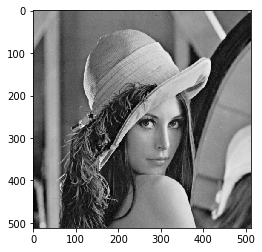

In [234]:
plt.imshow(image)

In [235]:
image = np.array(image)

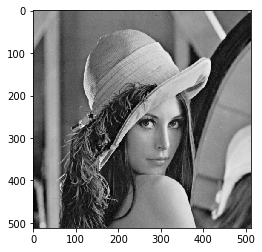

In [236]:
plt.imshow(image)

In [237]:
binary_image = where (image > 100, 1, 0)

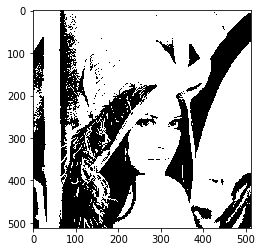

In [238]:
plt.imshow(binary_image)

In [239]:
noise_image = binary_image.copy()
noise_level = np.random.rand(binary_image.shape[0], binary_image.shape[1])
random_cordinates_active = where(noise_level < 0.2)
noise_image[random_cordinates_active] = (1 - random_cordinates[random_cordinates_active])


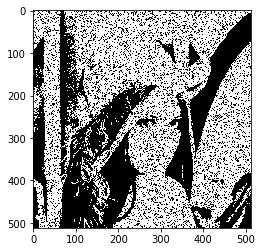

In [240]:
plt.imshow(noise_image)

In [241]:
def neighbor(y,x,image_shape):
    if (y==0 and x==0):
        neighbor=[(0,1), (1,0)]
    elif y==0 and x==image_shape[1]-1:
        neighbor=[(0,image_shape[1]-2), (1,image_shape[1]-1)]
    elif y==image_shape[0]-1 and x==0:
        neighbor=[(image_shape[0]-1,1), (image_shape[0]-2,0)]
    elif y==image_shape[0]-1 and x==image_shape[1]-1:
        neighbor=[(image_shape[0]-1,image_shape[1]-2), (image_shape[0]-2,image_shape[1]-1)]
    elif y==0:
        neighbor=[(0,x-1), (0,x+1), (1,x)]
    elif y==image_shape[0]-1:
        neighbor=[(image_shape[0]-1,x-1), (image_shape[0]-1,x+1), (image_shape[0]-2,x)]
    elif x==0:
        neighbor=[(y-1,0), (y+1,0), (y,1)]
    elif x==image_shape[1]-1:
        neighbor=[(y-1,image_shape[1]-1), (y+1,image_shape[1]-1), (y,image_shape[1]-2)]
    else:
        neighbor=[(y-1,x), (y+1,x), (y,x-1), (y,x+1),
                (y-1,x-1), (y-1,x+1), (y+1,x-1), (y+1,x+1)]
    return neighbor


In [242]:
def cost_function(x, y, prev_image, index):   
    return int(x == y) + sum(int(y == prev_image[i]) for i in index)

In [243]:
def MFR(noise_image):
    prev_image = noise_image
    new_image = np.zeros(image.shape)
    
    heigth, width = image.shape

    for i in range(3):
        for y in range(heigth):
            for x in range(width):
                neighbor_index = neighbor(y, x, (heigth, width))
                
                zero = cost_function(noise_image[y, x], 0, prev_image, neighbor_index)
                one = cost_function(noise_image[y, x], 1, prev_image, neighbor_index)
                new_image[y, x] = int(one > zero)
        prev_image = new_image.copy()
    return new_image

In [244]:
new_image = MFR(noise_image)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


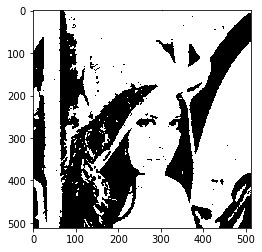

In [245]:
plt.imshow(new_image)

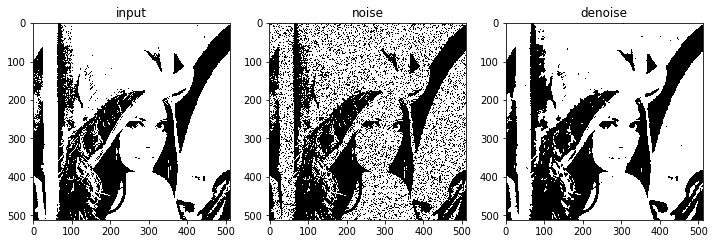

In [246]:
figure, axes = plt.subplots(1, 3, figsize=(12, 12))
axes[0].set_title("input")
axes[0].imshow(binary_image)
axes[1].set_title("noise")
axes[1].imshow(noise_image)
axes[2].set_title("denoise")
axes[2].imshow(new_image)